In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [3]:
input_file = 'Seahorse_on_HLMVEC_Dec_2nd.xlsx'

palette = ['black', 'tab:orage', 'tab:red']

In [4]:
df = pandas.read_excel(input_file, sheet_name='Rate')
df

In [54]:
df['Group'].unique()

array(['Background', 'Control', '24 HRS - Adreanline:Noradrenaline 5 uM',
       '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Tnfa',
       '4 HRS - Adreanline:Noradrenaline 5 uM',
       '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Tnfa'],
      dtype=object)

Control
	 before normalization


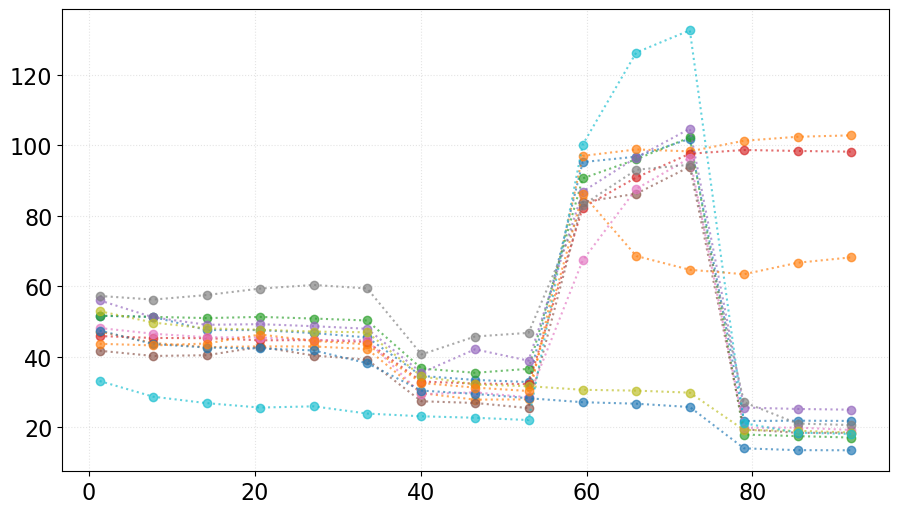

4 HRS - Adreanline:Noradrenaline 0.5 uM
	 before normalization


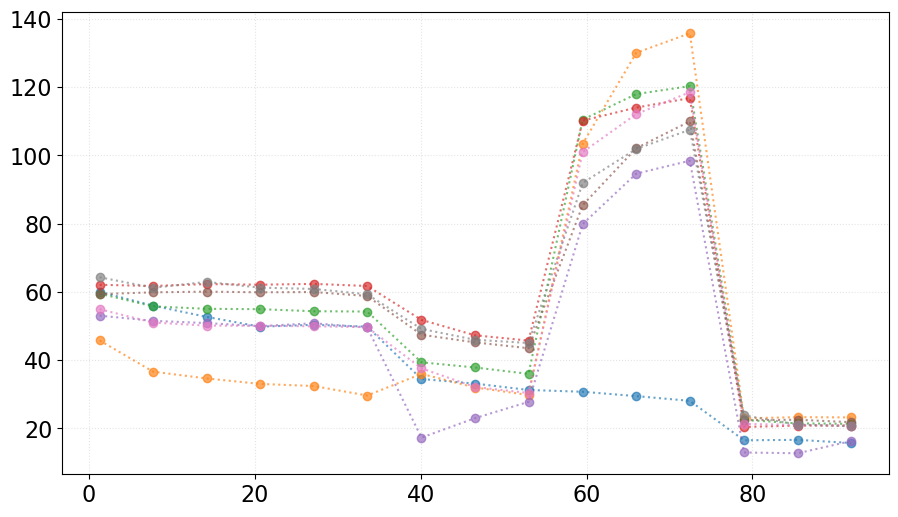

4 HRS - Adreanline:Noradrenaline 5 uM
	 before normalization


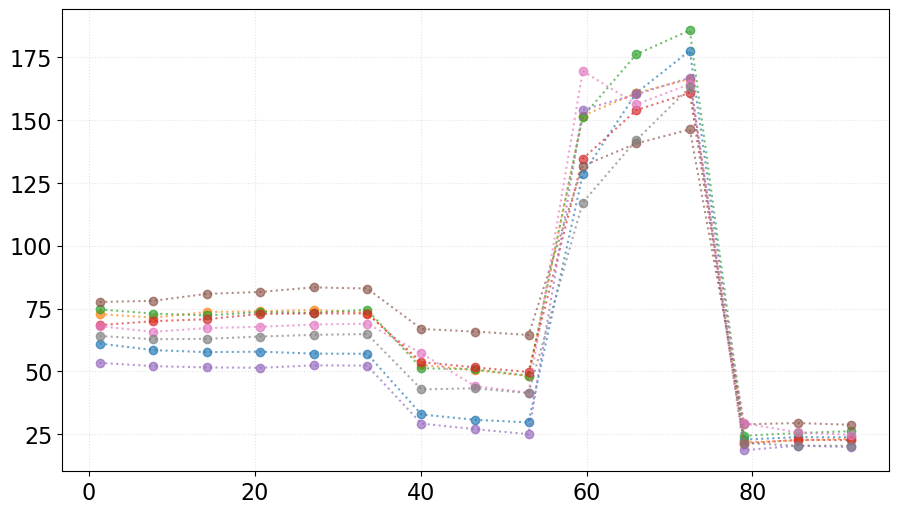

In [64]:
working_groups = ['Control', '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Adreanline:Noradrenaline 5 uM']

for condition in working_groups:
    print(condition)
    sub = df[df['Group'] == condition]

    dff = pandas.DataFrame()
    wells = sub['Well'].unique()
    for well in wells:
        trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
        trajectory.set_index('Time', inplace=True)
        trajectory.rename(columns={'OCR': well}, inplace=True)
        dff[well] = trajectory[well]

    # plots
    print('\t before normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()




In [6]:
condition = '4 HRS - Adreanline:Noradrenaline 5 uM'
sub = df[df['Group'] == condition]

In [14]:
sub[sub['Well'] == 'E03']

,Measurement,Well,Group,Time,OCR,ECAR,PER
50,1,E03,4 HRS - Adreanline:Noradrenaline 5 uM,1.309773,61.078403,7.336733,0
146,2,E03,4 HRS - Adreanline:Noradrenaline 5 uM,7.760609,58.478463,6.890651,0
242,3,E03,4 HRS - Adreanline:Noradrenaline 5 uM,14.209145,57.653785,6.999504,0
338,4,E03,4 HRS - Adreanline:Noradrenaline 5 uM,20.659538,57.844839,7.073279,0
434,5,E03,4 HRS - Adreanline:Noradrenaline 5 uM,27.106986,57.081481,7.535313,0
530,6,E03,4 HRS - Adreanline:Noradrenaline 5 uM,33.557364,56.988483,7.142354,0
626,7,E03,4 HRS - Adreanline:Noradrenaline 5 uM,40.107075,32.857983,10.969268,0
722,8,E03,4 HRS - Adreanline:Noradrenaline 5 uM,46.558269,30.744596,10.715743,0
818,9,E03,4 HRS - Adreanline:Noradrenaline 5 uM,53.010885,29.709520,10.165988,0
914,10,E03,4 HRS - Adreanline:Noradrenaline 5 uM,59.546650,128.403837,17.781969,0


In [33]:
trajectory

,OCR
Time,
1.309773,61.078403
7.760609,58.478463
14.209145,57.653785
20.659538,57.844839
27.106986,57.081481
33.557364,56.988483
40.107075,32.857983
46.558269,30.744596
53.010885,29.709520


In [49]:
dff = pandas.DataFrame()
wells = sub['Well'].unique()
for well in wells:
    print(well)
    trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
    trajectory.set_index('Time', inplace=True)
    trajectory.rename(columns={'OCR': well}, inplace=True)
    dff[well]=trajectory[well]
dff

E03
E04
E05
E06
E07
E08
E09
E10


,E03,E04,E05,E06,E07,E08,E09,E10
Time,,,,,,,,
1.309773,61.078403,72.770411,74.653549,68.410881,53.414172,77.620416,67.988029,64.086645
7.760609,58.478463,71.403883,73.005383,69.979088,52.087410,78.081764,65.748166,62.781162
14.209145,57.653785,73.628652,72.261819,70.755295,51.596720,80.840468,67.219592,62.960194
20.659538,57.844839,73.920374,73.587729,72.866012,51.434452,81.615869,67.757722,63.870277
27.106986,57.081481,74.432765,73.295878,73.092902,52.394549,83.426254,68.628298,64.544108
33.557364,56.988483,73.426946,74.566587,73.030413,52.317546,82.967796,68.995284,64.863727
40.107075,32.857983,52.583291,51.269290,53.706962,29.213844,66.870780,57.162562,42.833576
46.558269,30.744596,50.552413,50.789116,51.565178,27.033795,65.841660,44.129271,43.287371
53.010885,29.709520,48.174985,48.294129,49.800345,25.029484,64.505658,41.547404,41.347763


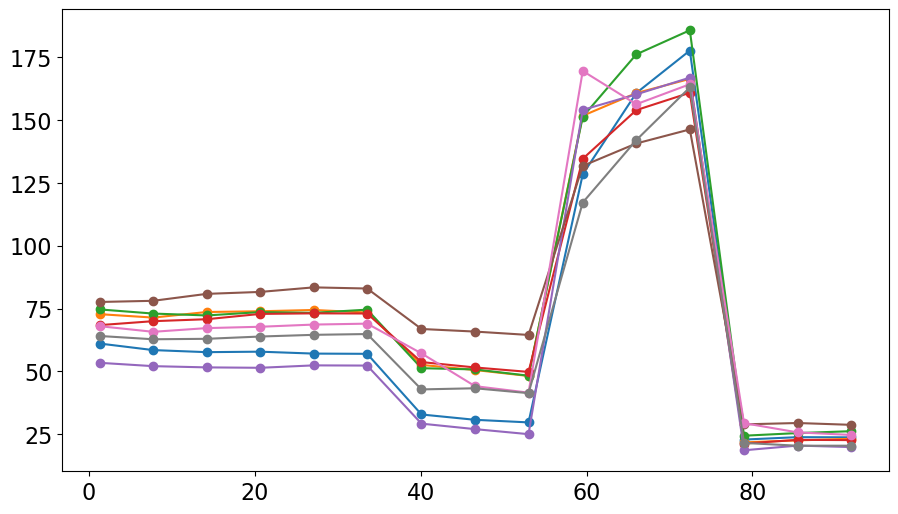

In [50]:
matplotlib.pyplot.plot(dff.index, dff, 'o-')
matplotlib.pyplot.show()


In [51]:
relative_mu = dff.mean()/dff.mean().mean()
print(relative_mu)
normalized_green = dff/relative_mu


E03    0.907808
E04    1.053753
E05    1.094270
E06    1.018633
E07    0.866029
E08    1.100449
E09    1.036948
E10    0.922110
dtype: float64


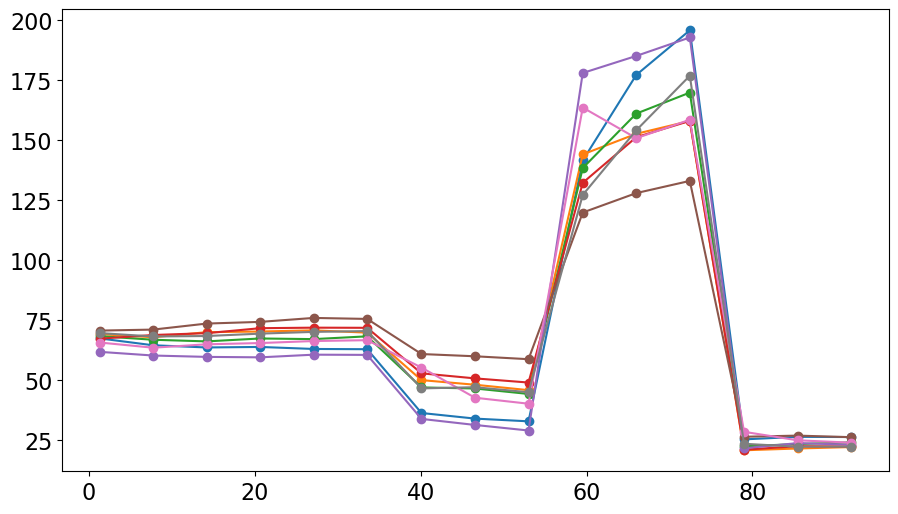

In [53]:
matplotlib.pyplot.plot(dff.index, normalized_green, 'o-')
matplotlib.pyplot.show()


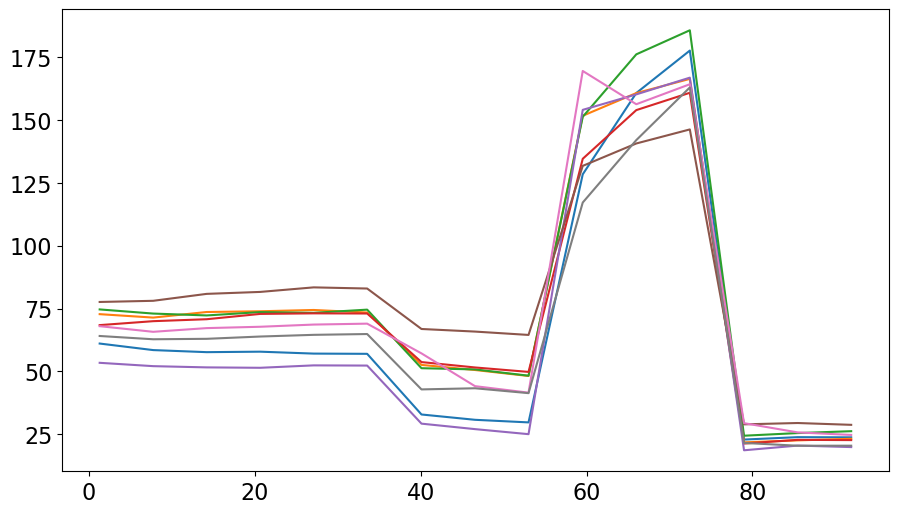

[[ 61.07840274  58.4784628   57.65378484  57.84483896  57.08148061
   56.98848276  32.85798309  30.74459585  29.70952026 128.40383682
  160.74183093 177.62925144  22.88448788  23.83809646  23.76444718]
 [ 72.77041111  71.40388253  73.62865188  73.92037437  74.43276468
   73.42694617  52.58329061  50.55241317  48.17498546 151.69496274
  160.72390696 166.36335008  21.77613584  22.55700924  23.19264108]
 [ 74.65354865  73.00538271  72.26181893  73.58772923  73.29587757
   74.56658671  51.2692905   50.78911574  48.29412924 151.29100702
  176.12269843 185.70145293  24.4124081   25.46522429  26.21115165]
 [ 68.41088115  69.97908844  70.75529475  72.86601199  73.09290229
   73.03041259  53.70696196  51.56517815  49.80034492 134.57848694
  153.93953757 160.84066731  21.29597893  22.76789214  22.67144651]
 [ 53.41417157  52.08741003  51.59671983  51.43445176  52.39454921
   52.31754558  29.21384447  27.03379454  25.02948426 154.04034232
  160.19943566 166.85625735  18.6203312   20.48453753  19.

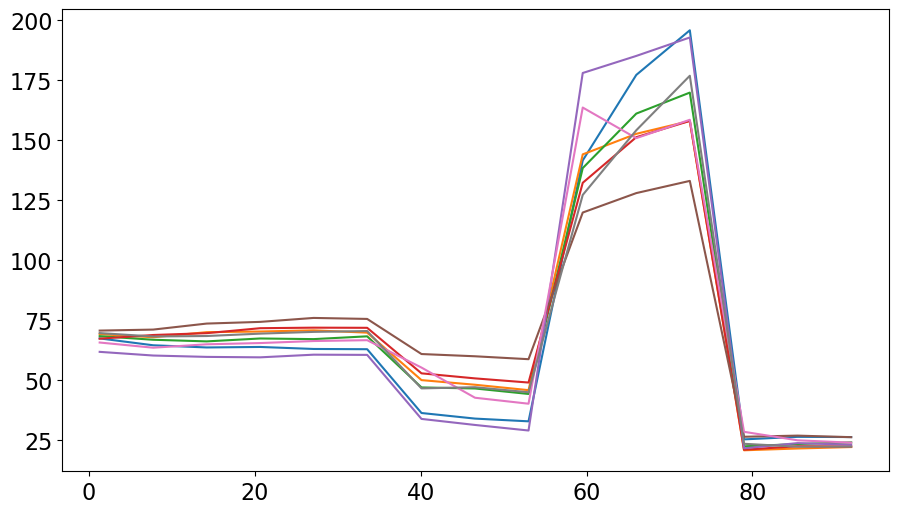

In [9]:
wells = sub['Well'].unique()

full = []
for well in wells:
    welldf = sub[sub['Well'] == well]
    time = welldf['Time']
    ocr = welldf['OCR']

    # plot
    matplotlib.pyplot.plot(time, ocr)

    # get values for normalization
    x = ocr.to_list()
    full.append(x)

matplotlib.pyplot.show()

# get values for normalization
matrix = numpy.array(full)
trajectories_means = matrix.mean(axis=1)
reference_value = trajectories_means.mean()
bias = trajectories_means / reference_value
correction = 1/bias

print(matrix)
print(trajectories_means)
print(reference_value)
print(bias)

normalized = (matrix.T * correction).T
print(normalized)

matplotlib.pyplot.plot(time, normalized.T)
matplotlib.pyplot.show()
